<p style="font-size: 30px; line-height: 135%;}">
<b>2 Análisis de audios como datos brutos</b>
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier as Tree
from IPython.display import display


In [2]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta a</b>

</p>

In [3]:
from IPython.display import display
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

#Descipción del dataset
from collections import Counter
df.info()

display(df.head())

print(Counter(df.iloc[:,2]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
dataset     176 non-null object
fname       176 non-null object
label       124 non-null object
sublabel    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


Counter({nan: 52, 'artifact': 40, 'murmur': 34, 'normal': 31, 'extrahls': 19})


<p style="font-size: 18px; line-height: 135%;}">
<b>a)</b> 
El dataset contiene 176 registros de latidos cardiacos, 124 de ellos tienen una etiqueta asignada (artifact, murmur, extrahls, normal). 52 de esto registros no tienen una etiqueta.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta b</b>

</p>

In [4]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

new_df.head()

,file_name,time_series,len_series
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900


<p style="font-size: 18px; line-height: 135%;}">
<b>b)</b> 
Al transformar los <i> .wav </i> en secuencias de tiempo no todas quedarán del mismo largo debido a que no todos los audios tienen la misma duración, entonces, como las secuencias de tiempo van a ser los datos a usar para entrenar la máquina (implicitamente), es necesario que estos tenga la misma cantidad de atributos, esto se logra ocupando un padding de 0, el cual rellena con 0's la secuencia de tiempo hasta que tenga el largo de la secuencia máxima.

<br><br>

Una segunda alternativa para lograr dejar los datos con la misma cantidad de dimensiones es en cada audio volver a replicar la secuencia de tiempos, ya que como son sonidos periodicos (se supone) sería"extra-polar" la data.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta c</b>

</p>

In [5]:
new_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]

#Procederé a contar el número de registros por clase
clases = dict()
clases["artifact"] = 0
clases["normal/extrahls"] = 0
clases["murmur"] = 0
    
for i in new_labels:
    if i == 0:
        clases["artifact"]+=1
    elif i==1:
        clases["normal/extrahls"]+=1
    elif i==2:
        clases["murmur"]+=1
print("Los registros por clase son:")
display(clases)
#display(new_df)

Los registros por clase son:


{'artifact': 58, 'murmur': 53, 'normal/extrahls': 65}

<p style="font-size: 18px; line-height: 135%;}">
<b>c)</b> 
Al tener datos mal etiquetados se contribuye a que la máquina no aprenda correctamente, entonces la predicciones que haga sobre los datos de la realidad (que si están bien etiquetados) serán erroneos. Que ocurra lo anteriormente descrito depende del tipo de máquina con el cuál se esté trabajando, por ejemplo una SVM Hard-Marging si se verá afectada por 1 dato puesto que esta máquina no permite que se viole la restricción sobre el margen, entonces desplazará la frontera según ese punto, en un caso extremo podría volver el problema no linealmente separable haciendo que este no tenga solución con una máquina SVM Hard-Margin. 

<br><br>

En el caso de una SVM general (soft-margin) dependerá del valor del parámetro de regularización, si el parámetro es muy alto 1 punto si influirá, en caso de que este sea muy pequeño probablemente no afecte.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta d</b>

</p>

In [6]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

#display(new_df)

<p style="font-size: 18px; line-height: 135%;}">
<b>d)</b> 
Después de ejecutar estos comandos se asigna a artifact 0, a normal/extrahls 2 y a murmur 1
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta e</b>
</p>

In [7]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

(176, 396900)

<p style="font-size: 18px; line-height: 135%;}">
<b>e)</b> 

La relación entre la cantidad de ejemplos y dimensiones es muy desigual, se tienen 3 ordenes de magnitud más de dimensiones que de ejemplos, esto puede causar problemas dado que al tener tan pocos ejemplos en relación a la cantidad de dimensiones la máquina entrenada no podrá generalizar bien el comportamiento de la data.

<br><br>

Otra razón es el problema de la dimensionalidad en donde a mayor dimensiones es más difícil trasar una frontera que separe bien los datos, dado que estos se van separando más en la medida que tienen más dimensiones.

</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta f</b>
</p>

In [8]:
X_fourier = np.abs(np.fft.fft(X))

<p style="font-size: 18px; line-height: 135%;}">
<b>f)</b> 
Después de aplicar esta transformada de fourier cada secuencia de tiempo fue transformada a frecuencias.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta g</b>
</p>

In [9]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

<p style="font-size: 18px; line-height: 135%;}">
<b>g)</b> 
La dimensionalidad de las muestras ahora se redujo casí 4 veces, esto es bueno ya que como se mencionó anteriormente tener tantas dimensiones puede ocacionar dificultades.

<br><br>

Se podría comprobar el grado de representatividad al comparar la distribución de las frecuencias de cada sonido, entonces si es que la muestra es representativa se espera que las frecuencias originales y las frecuencias de la muestra se distribuyan igualmente.
<br><br>

Una muestra representativa se puede entender como aquella que refleja las carácteristicas de la población, pero esta es más pequeña que la población total.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta h</b>
</p>

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)

#Se procede a mostrar información solicitada
print("[Entrenamiento] Tamaño",X_train.shape[0])
print("[Entrenamiento] Cantidad de clases")
print(Counter(y_train))
print("")

print("[Test] Tamaño",X_test.shape[0])
print("[Test] Cantidad de clases")
print(Counter(y_test))

[Entrenamiento] Tamaño 132
[Entrenamiento] Cantidad de clases
Counter({0: 48, 2: 44, 1: 40})

[Test] Tamaño 44
[Test] Cantidad de clases
Counter({2: 21, 1: 13, 0: 10})


<p style="font-size: 18px; line-height: 135%;}">
<b>h)</b>
La información solicitada está mostrada en los prints de arriba. 
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta i</b>
</p>

In [11]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta j</b>
</p>

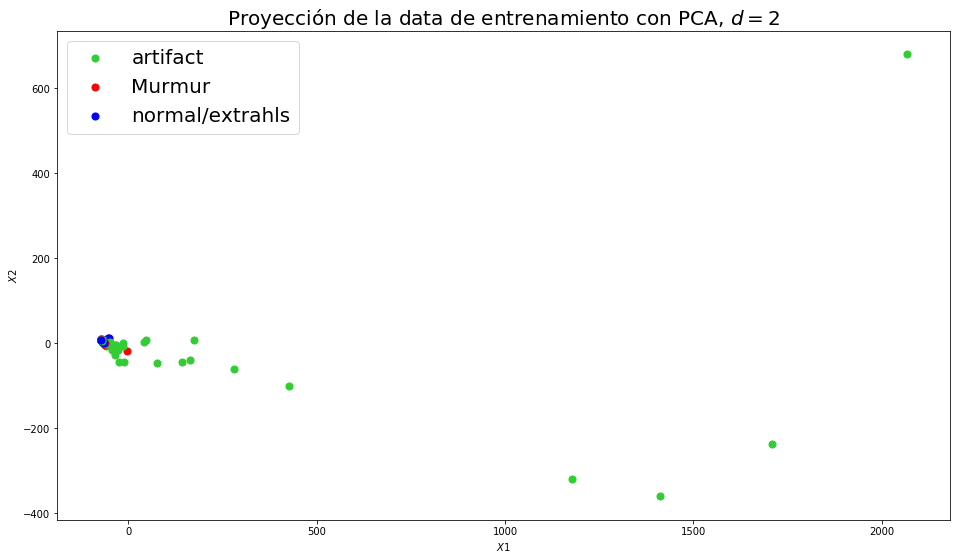

In [12]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

#Se procede a gráficar los elementos
plt.figure(figsize = (16, 9))

for i in range(len(X_pca_train)):
    if y_train[i] == 0:
        p1 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "limegreen")
    elif y_train[i] == 1:
        p2 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "red")
    elif y_train[i] == 2:
        p3 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "blue")
        
plt.legend([p1, p2, p3], ["artifact", "Murmur", "normal/extrahls"], prop={'size': 20})
        
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.title("Proyección de la data de entrenamiento con PCA, $d = "+str(d)+"$", size = 20)
plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>j)</b>
Al ver los datos representados después de aplicar la reducción PCA se aprecia que estos están mayoritariamente concentrados cerca del 0, los datos más distribuidos a lo largo del gráfico son los pertenecientes a la clase Artifact.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta k</b>
</p>

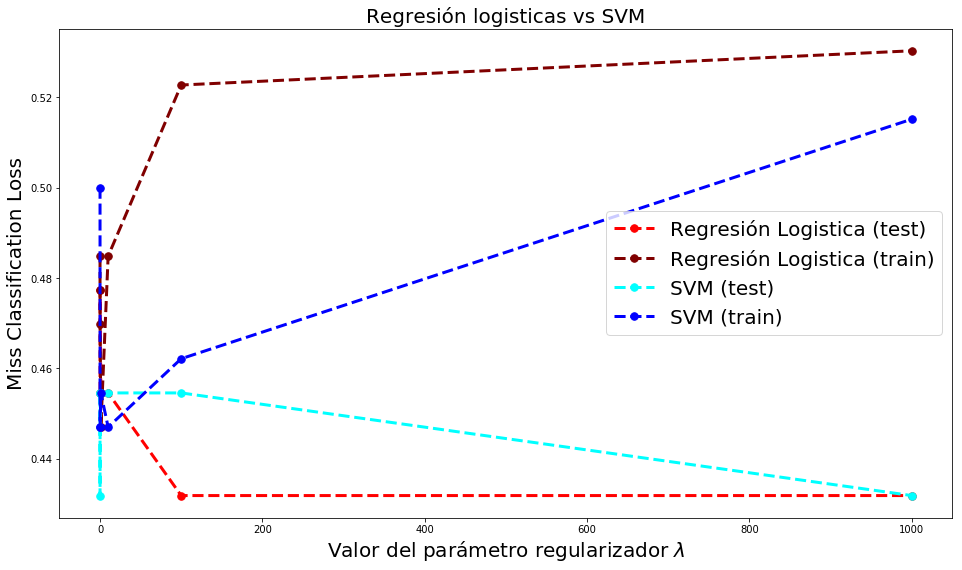

In [13]:
cs = [0.0001,0.01,0.1,1,10,100,1000]
errores = list()

for i in cs:

    #Regresión logistica
    modeloLR = LR()
    modeloLR.set_params(C=1/i,penalty='l2') #Se ingresa 1/i para que ambos ocupen el mismo lambda
    modeloLR.fit(X_pca_train,y_train)

    
    #Predicción del error de entrenamiento
    y_pred = modeloLR.predict(X_pca_train)
    e_trainLR = 1-accuracy_score(y_train, y_pred)
    
    #Predicción del error de test
    y_pred = modeloLR.predict(X_pca_test)
    e_testLR = 1-accuracy_score(y_test, y_pred)

    #SVM lineal
    modeloSVM= SVM()
    modeloSVM.set_params(C=i,kernel='linear')
    modeloSVM.fit(X_pca_train,y_train)
    
    #Predicción del error de entrenamiento
    y_pred = modeloSVM.predict(X_pca_train)
    e_trainSVM = 1-accuracy_score(y_train, y_pred)
    
    #Predicción del error de test
    y_pred = modeloSVM.predict(X_pca_test)
    e_testSVM = 1-accuracy_score(y_test, y_pred)
    
    errores.append((e_testLR, e_trainLR, e_testSVM, e_trainSVM))
    
#print(errores)

fig = plt.figure(figsize = (16, 9))
grosor = 3
tamañopto = 15
#Procedo a graficar
plt.plot(cs, [i[0] for i in errores], ".--", color = "red", linewidth = grosor, markersize = tamañopto) #test
plt.plot(cs, [i[1] for i in errores], ".--", color = "maroon", linewidth = grosor, markersize = tamañopto) #train
plt.plot(cs, [i[2] for i in errores], ".--", color = "cyan", linewidth = grosor, markersize = tamañopto) #test
plt.plot(cs, [i[3] for i in errores], ".--", color = "blue", linewidth = grosor, markersize = tamañopto) #train

plt.legend(["Regresión Logistica (test)", "Regresión Logistica (train)", "SVM (test)", "SVM (train)"], prop={'size': 20})

plt.title('Regresión logisticas vs SVM', fontsize=20)
plt.xlabel("Valor del parámetro regularizador $\lambda$", fontsize=20)
plt.ylabel("Miss Classification Loss", fontsize=20)

plt.show()


<p style="font-size: 18px; line-height: 135%;}">
<b>k)</b>
Al gráficar el error sobre el conjunto de entrenamiento se aprecia que en ambos métodos al ocupar un parámetro de regularización ($\lambda$) más grande se disminuye el error de test, pero se incrementa el error de entrenamiento. Esto nos dice que efectivamente el parámetro está haciendo lo que debe, es decir, mejorar el poder de generalización sobre la máquina.
<br><br>
Entonces por lo anteriormente dicho en lo que resta del desarrollo cuando se ocupe una SVM, esta será regularizada con $\lambda = 1000$ 
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta l</b>
</p>

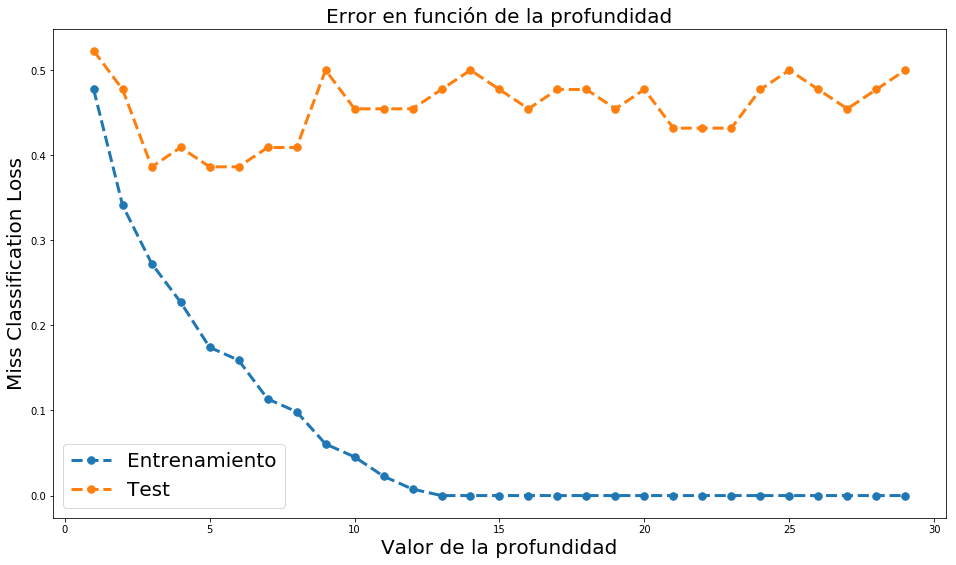

In [14]:
Depths = range(1,30)
errores = list()
for i in Depths:
    modeloTree = Tree() #edit the train_model function
    modeloTree.set_params(max_depth=i,criterion='gini',splitter='best')
    modeloTree.fit(X_pca_train,y_train)
    
    #Se calcula error de entrenamiento
    y_pred = modeloTree.predict(X_pca_train)
    e_train = 1-accuracy_score(y_train, y_pred)
    
    #Se calcula el error de test
    y_pred = modeloTree.predict(X_pca_test)
    e_test = 1-accuracy_score(y_test, y_pred)
    
    errores.append( (e_train, e_test) )

fig = plt.figure(figsize = (16, 9))
grosor = 3
tamañopto = 15
plt.plot(Depths, [i[0] for i in errores], ".--", linewidth = grosor, markersize = tamañopto) #train
plt.plot(Depths, [i[1] for i in errores], ".--", linewidth = grosor, markersize = tamañopto) #test

plt.legend(["Entrenamiento", "Test"], prop={'size': 20})

plt.title('Error en función de la profundidad', fontsize=20)
plt.xlabel("Valor de la profundidad", fontsize=20)
plt.ylabel("Miss Classification Loss", fontsize=20)

plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>l)</b>

Al aumentar la profundidad máxima se aprecia que el error sobre el conjunto de entrenamiento disminuye incluso llegando hasta 0, pero el error de prueba incrementa, entonces claramente se esta presente ante un caso de over-fitting, en donde se diminuyó el error sobre el conjunto de entrenamientos, pero, se perdió el poder de generalización de la máquina.

<br><br>

Al compararlo con el gráfico anterior se observa que a mayor profundidad no hay menor error de entrenamiento. 

</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta m</b>
</p>

Iteración 2 completada.
Iteración 3 completada.
Iteración 4 completada.
Iteración 5 completada.
Iteración 6 completada.
Iteración 7 completada.
Iteración 8 completada.


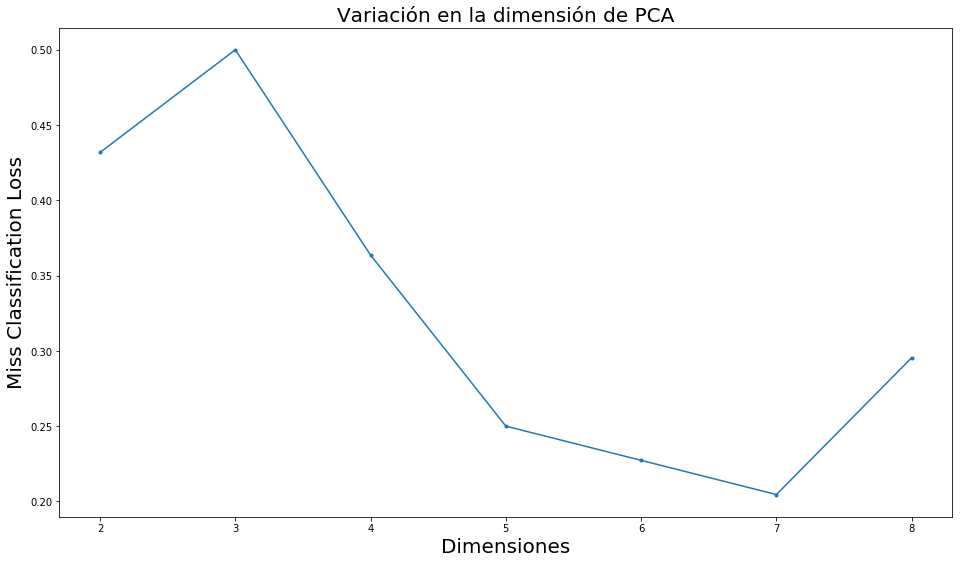

In [15]:
erroresPCA = list()
num = 8 + 1
for d in range(2, num):    
    pca_model = PCA(n_components=d)
    pca_model.fit(X_train)
    X_pca_train = pca_model.transform(X_train)
    X_pca_test = pca_model.transform(X_test)
    
    #SVM lineal
    modeloSVM= SVM()
    modeloSVM.set_params(C=1000,kernel='linear')
    modeloSVM.fit(X_pca_train,y_train)

    y_pred = modeloSVM.predict(X_pca_test)
    erroresPCA.append(1-accuracy_score(y_test, y_pred))
    print("Iteración",d,"completada.")
    

fig = plt.figure(figsize = (16, 9))
plt.plot(range(2, num), [i for i in erroresPCA], ".-")

#plt.legend(["Regresión Logistica", "SVM"], prop={'size': 20})

plt.title('Variación en la dimensión de PCA', fontsize=20)
plt.xlabel("Dimensiones", fontsize=20)
plt.ylabel("Miss Classification Loss", fontsize=20)

plt.show()


<p style="font-size: 18px; line-height: 135%;}">
<b>m)</b>
Al variar el número de dimensiones se aprecia que decrementa el error, esto se debe que al tener más dimensiones significativas la máquina (en este caso SVM) puede clasificar mejor dado que los datos probablemente quedan más separados haciendo posible definir una buena frontera.

<br><br>

Si bien en la medida que se agregan más dimensiones decrece el error llega un momento en que este vuelve a crecer, entonces hay un número óptimo de dimensiones por lo menos para la máquina utilizada (SVM con kernel lineal). Este número encontrado fue de aproximadamente 7 (veríficar arriba), es importante destacar que sólo se gráfico hasta las 20 dimensiones, seguir con más dimensiones es muy costoso computacionalmente.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta n</b>
</p>

/home/fco/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


El número de condición es
 1.46088213572e+16


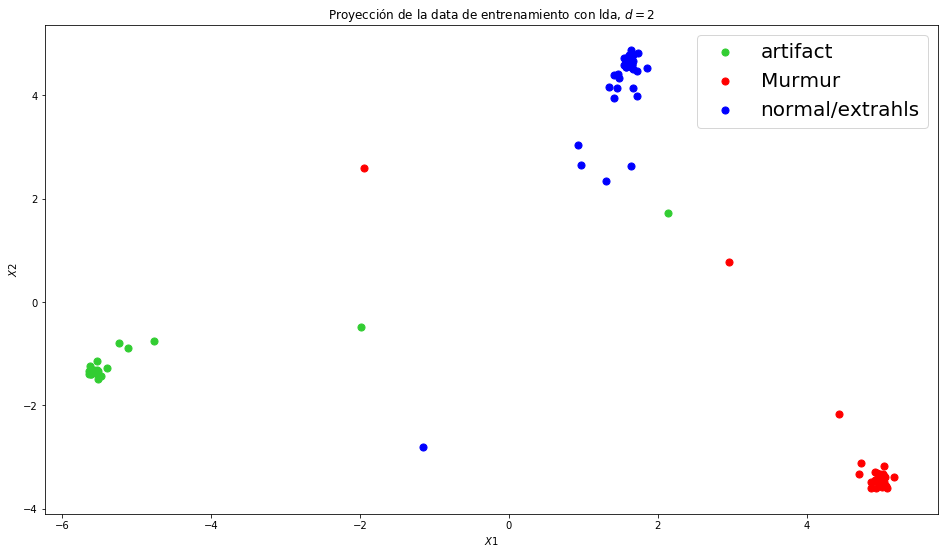

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_lda_train = model_lda.transform(X_train)
X_lda_test = model_lda.transform(X_test)

numeroCondicion = np.linalg.cond(X_train)
print("El número de condición es\n", numeroCondicion)

#Se procede a gráficar los elementos
plt.figure(figsize = (16, 9))

for i in range(len(X_lda_train)):
    if y_train[i] == 0:
        p1 = plt.scatter(X_lda_train[i,0], X_lda_train[i,1], s=50, c = "limegreen")
    elif y_train[i] == 1:
        p2 = plt.scatter(X_lda_train[i,0], X_lda_train[i,1], s=50, c = "red")
    elif y_train[i] == 2:
        p3 = plt.scatter(X_lda_train[i,0], X_lda_train[i,1], s=50, c = "blue")
        
plt.legend([p1, p2, p3], ["artifact", "Murmur", "normal/extrahls"], prop={'size': 20})        
        
        
plt.xlabel("$X1$")
plt.ylabel("$X2$")
plt.title("Proyección de la data de entrenamiento con lda, $d = 2$")
plt.show()

<p style="font-size: 18px; line-height: 135%;}">
<b>n)</b>
El warning lo que dice es que hay 2 o más variables collineares, esto se debe a que la matriz es mal condicionada (número de condición del orden de $10^{16}$ ). El método LDA en su implementación requiere de una matriz bien condicionada ya que hace una inversión de esta. Si la matriz está mal condicionada provoca que al invertirla se generen datos con errores.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta o</b>
</p>

In [17]:
def pregunta2O():
    #SVM lineal entrenada con LDA d=2
    modeloSVM= SVM()
    modeloSVM.set_params(C=1000,kernel='linear')
    modeloSVM.fit(X_lda_train, y_train)
    
    y_pred = modeloSVM.predict(X_lda_test)
    print("[Reducción LDA] Miss Classification Loss",1-accuracy_score(y_test, y_pred))
    
    #SVM lineal entrenada con PCA d=2
    pca_model = PCA(n_components=2)
    pca_model.fit(X_train)
    X_pca_train = pca_model.transform(X_train)
    X_pca_test = pca_model.transform(X_test)
    
    modeloSVM2= SVM()
    modeloSVM2.set_params(C=1000,kernel='linear')
    modeloSVM2.fit(X_pca_train, y_train)
    
    y_pred = modeloSVM2.predict(X_pca_test)
    print("[Reducción PCA] Miss Classification Loss",1-accuracy_score(y_test, y_pred))
    
pregunta2O()

[Reducción LDA] Miss Classification Loss 0.295454545455
[Reducción PCA] Miss Classification Loss 0.409090909091


<p style="font-size: 18px; line-height: 135%;}">
<b>o)</b>
Al comparar ambas representasiones con una SVM lineal, se aprecia que la reducción mediante LDA tiene un menor error (10% menos app). Esto es de esperar ya que al comparar la representasión de ambas reducciones se aprecia que en la de PCA la gran mayoría de los puntos están juntos, haciendo más difícil la definición de una frontera y provocando más error. En el caso de LDA se aprecia una mejor distribución de los datos, entonces esto permite generar mejores fronteras.

<br><br>

Importante destacar que la reducción de LDA al ser supervisada sólo puede generar una reducción de dimensiones de a lo más el número de clases-1, entonces, en este caso sólo se podía hacer una reducción a 2 dimensiones, es por esto que se comparan 2 SVM lineales y ambas entrenadas con reducciones a 2 dimesiones para que esten en igualdad de condiciones (ya que como se dijo anteriormente con más dimensiones de PCA el resultado puede mejorar).

</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Parte 2, pregunta p</b>
</p>

In [18]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
df_nuevo = pd.DataFrame(columns = ['min', 'max', 'mean'])
nuevoo = np.zeros((len(X_resampled), 3))

#Se proceden a calcular las nuevas carácteristicas mínimo, media y máxima
for i in range(len(X_resampled)):
    nuevoo[i, 0] = min(X_resampled[i,:])
    nuevoo[i, 1] = max(X_resampled[i,:])
    nuevoo[i, 2] = np.mean(X_resampled[i,:])
print("Se terminaron de procesar las carácteristicas.")
    
#Se generan los conjuntos sobre las carácteristicas
X_train, X_test, y_train, y_test = train_test_split(nuevoo, y, test_size=0.25, random_state=42)

m_svm = SVC()
modeloSVM.set_params(C=1000, kernel="linear")
#Se estandariza el dataset
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
X_tr = rbs.fit_transform(X_train)
X_ts = rbs.transform(X_test)

#Se procede a entrenar la máquina y obtener el error
m_svm.fit(X_tr, y_train)
print("Miss Classification Loss:",1-m_svm.score(X_ts, y_test))

Se terminaron de procesar las carácteristicas.
Miss Classification Loss: 0.25


<p style="font-size: 18px; line-height: 135%;}">
<b>p)</b>

Se aprecia que el error de la nueva máquina es menor que el de una SVM entrenada con reducción de dimensionalidad con LDA o PCA.

</p>

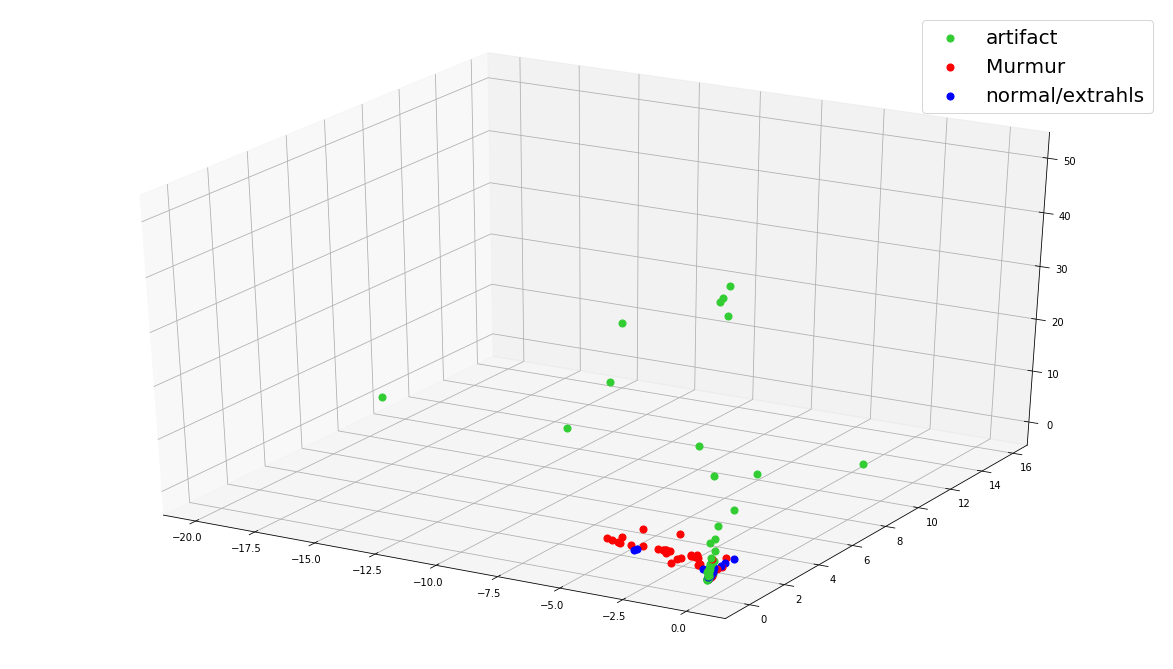

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (16, 9))

ax = Axes3D(fig)
for i in range(len(X_lda_train)):
    if y_train[i] == 0:
        p1 = ax.scatter(X_tr[i,0], X_tr[i,1], X_tr[i, 2], s=50, c = "limegreen")
    elif y_train[i] == 1:
        p2 = ax.scatter(X_tr[i,0], X_tr[i,1], X_tr[i, 2], s=50, c = "red")
    elif y_train[i] == 2:
        p3 = ax.scatter(X_tr[i,0], X_tr[i,1], X_tr[i, 2], s=50, c = "blue")
        
        
plt.legend([p1, p2, p3], ["artifact", "Murmur", "normal/extrahls"], prop={'size': 20})
plt.show()

<p style="font-size: 18px; line-height: 135%;}">

Al ver el gráfico del espacio se aprecia que los puntos están aun más dispersos, entonces, este es el factor clave que hace posible que se genere una mejor frontera para separar a las clases.
<br><br>

Después se intentó probar con otra combinación de parámetros (min, max, media y varianza) o (min, max, varianza)
</p>

In [20]:
#Caso de min, max, media y varianza
df_nuevo = pd.DataFrame(columns = ['min', 'max', 'mean', "var"])
nuevoo = np.zeros((len(X_resampled), 4))

for i in range(len(X_resampled)):
    nuevoo[i, 0] = min(X_resampled[i,:])
    nuevoo[i, 1] = max(X_resampled[i,:])
    nuevoo[i, 2] = np.mean(X_resampled[i,:])
    nuevoo[i, 3] = np.var(X_resampled[i,:])
    
#Se generan los conjuntos sobre las carácteristicas
X_train, X_test, y_train, y_test = train_test_split(nuevoo, y, test_size=0.25, random_state=42)

m_svm = SVC()
modeloSVM.set_params(C=1000, kernel="linear")
#Se estandariza el dataset
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
X_tr = rbs.fit_transform(X_train)
X_ts = rbs.transform(X_test)

#Se procede a entrenar la máquina y obtener el error
m_svm.fit(X_tr, y_train)
print("Miss Classification Loss:",1-m_svm.score(X_ts, y_test))

Miss Classification Loss: 0.25


In [21]:
#Caso de min, max, varianza
df_nuevo = pd.DataFrame(columns = ['min', 'max', "var"])
nuevoo = np.zeros((len(X_resampled), 3))

for i in range(len(X_resampled)):
    nuevoo[i, 0] = min(X_resampled[i,:])
    nuevoo[i, 1] = max(X_resampled[i,:])
    nuevoo[i, 2] = np.var(X_resampled[i,:])
    
#Se generan los conjuntos sobre las carácteristicas
X_train, X_test, y_train, y_test = train_test_split(nuevoo, y, test_size=0.25, random_state=42)

m_svm = SVC()
modeloSVM.set_params(C=1000, kernel="linear")
#Se estandariza el dataset
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
X_tr = rbs.fit_transform(X_train)
X_ts = rbs.transform(X_test)

#Se procede a entrenar la máquina y obtener el error
m_svm.fit(X_tr, y_train)
print("Miss Classification Loss:",1-m_svm.score(X_ts, y_test))

Miss Classification Loss: 0.272727272727


<p style="font-size: 18px; line-height: 135%;}">

Pero se llega a la conclusión de que agregar la varianza da el mismo resultado y que considerar la varianza en ves de la media aumenta el error en orden de $10^{-2}$.

</p>